<a href="https://colab.research.google.com/github/cscholles/GoogleAnalytics-Pandas-Sheet/blob/master/DESAFIO_2_Bootcamp_IGTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importando as bibliotecas
import pandas as pd  #bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np #biblioteca utilizada para o tratamento eficiente de dados numéricos
import datetime  #biblioteca utilizada para trabalhar com datas
from matplotlib import pyplot as plt  #plotar os gráficos
import seaborn as sns #plot de gráficos

In [0]:
df_wine=pd.read_csv('/content/drive/My Drive/Colab Notebooks/BOOTCAMP | Machine Learning/arquivos/winequality-red.csv', sep=';')

Análise exploratória

In [13]:
df_wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [14]:
df_wine.shape

(1599, 12)

In [15]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [16]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


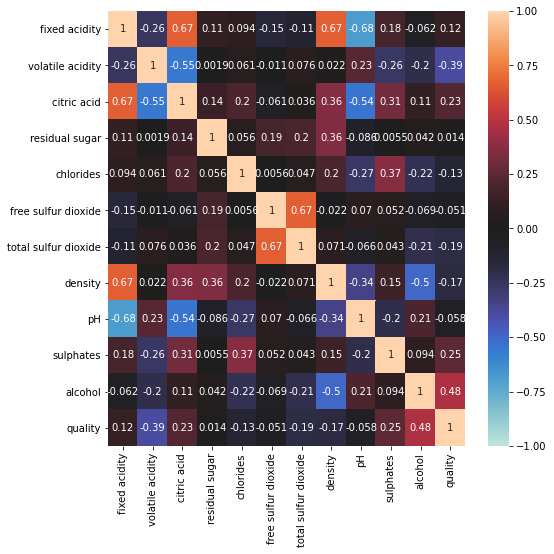

In [18]:
plt.figure(figsize=(8, 8))
matriz_de_correlação = df_wine.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [19]:
df_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3])

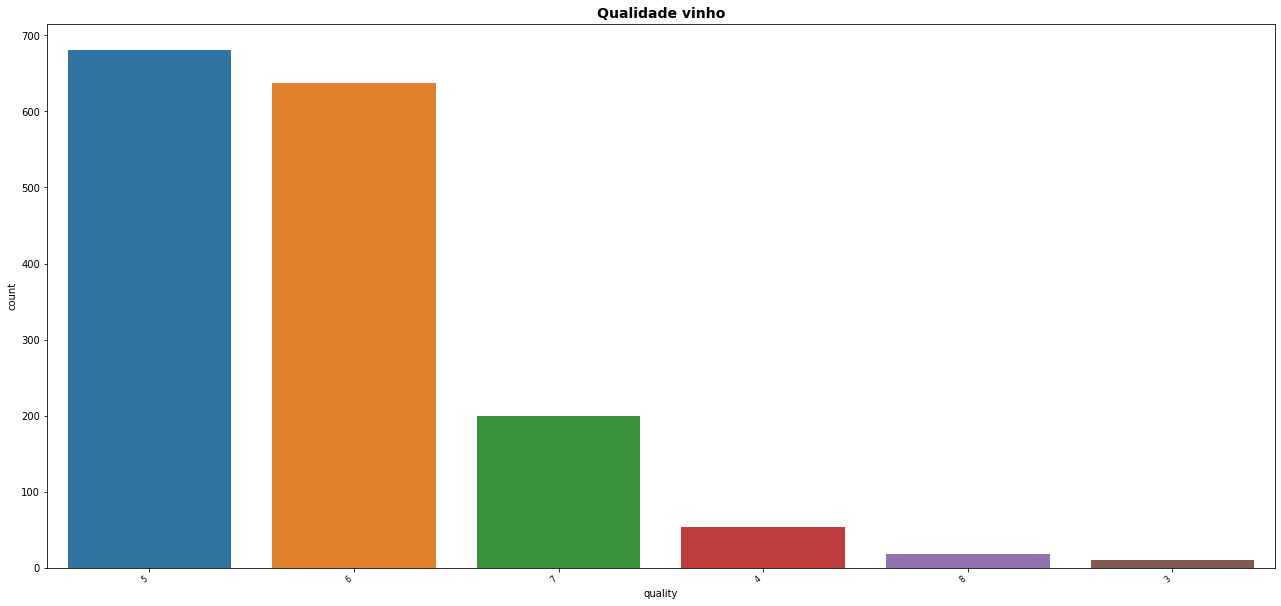

In [20]:
#plotando o número de consultas por região 
qualidade = df_wine['quality'].unique()
plt.figure(figsize=(22,10))
ax = sns.countplot(x='quality', data=df_wine, order=qualidade)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=8)
plt.title('Qualidade vinho', fontsize=14, fontweight='bold')
plt.show()

In [21]:
#contando a quantidade de valores distintos em cada uma das colunas
for colunas in list(df_wine.columns):
  print( "{0:25} {1}".format(colunas, df_wine[colunas].nunique()) )

fixed acidity             96
volatile acidity          143
citric acid               80
residual sugar            91
chlorides                 153
free sulfur dioxide       60
total sulfur dioxide      144
density                   436
pH                        89
sulphates                 96
alcohol                   65
quality                   6


Treinamento e teste dos algoritmos

In [0]:
#selecionando os dados para a construção da previsão
entradas = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
saida=['quality']

In [0]:
x=df_wine[entradas]
y=df_wine[saida]

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [25]:
x_train.shape

(1119, 11)

Algoritmo Árvore de Decisão


In [26]:
#aplicando um modelo de classificação via árvore de decisão
from sklearn.tree import DecisionTreeClassifier
clf_arvore = DecisionTreeClassifier() 
clf_arvore.fit(x_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#realiza a previsão com os dados
y_previsto = clf_arvore.predict(x_test) 

In [28]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_previsto)
print('Acurácia da àrvore de Decisão: ',acuracia)

Acurácia da àrvore de Decisão:  0.6


In [29]:
#contrução da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao = confusion_matrix(y_test, y_previsto)
print(matriz_confusao)

[[  0   0   0   2   0   0]
 [  2   2   9   5   3   0]
 [  1  10 143  41  11   1]
 [  0   4  57 112  21   1]
 [  0   1   3  16  30   2]
 [  0   0   0   0   2   1]]


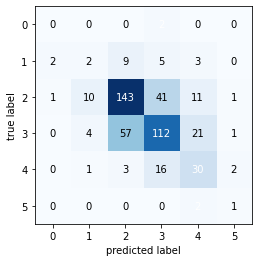

In [30]:
#realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?




In [32]:
#MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_wine)
X = pd.DataFrame(X, columns = df_wine.columns)

X['fixed acidity'].min()

0.0

Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurária para o KNN?

In [0]:
from sklearn.model_selection import train_test_split
X.drop(columns = ['quality'], inplace=True)
y = df_wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5) 
clf_KNN.fit(X_train, y_train)
acuracia = clf_KNN.score(X_test, y_test)

round(acuracia, 2)

0.56

Floresta Randomica | Aplicando o algoritmo de floresta randomica com os mesmos parâmetros apresentados no enunciado e mesmos valores treinamento e teste, qual é o valor da acurácia?

In [35]:
from sklearn.ensemble import RandomForestClassifier
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)
acuracia = clf_floresta.score(X_test, y_test)

round(acuracia, 2)

0.68

SVM | Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor de acurácia obtido?

In [36]:
from sklearn.svm import SVC

clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(X_train, y_train)
acuracia = clf_svm.score(X_test, y_test)

round(acuracia, 2)

0.59

Rede MLP Aplicando a rede MLP como mostrado no enunciado e com os mesmos dados de treinamento e teste utilizados, qual é a acurácia do modelo?

In [37]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1) 
clf_mlp.fit(X_train, y_train)

acuracia = clf_mlp.score(X_test, y_test)
round(acuracia, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.6

Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual a acurácia do modelo para esse novo dataset?



In [39]:
y_novo = (df_wine['quality'] > 5).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_novo, test_size=0.30, random_state=1)

clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(X_train, y_train)
acuracia = clf_floresta.score(X_test, y_test)

round(acuracia, 2)

0.8